In [120]:
import pandas as pd
import pingouin as pg
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [121]:
df = pandas.read_csv('nationwide_data.csv', low_memory=False)


In [101]:
print(df.shape)

# Print column names.
for col in df.columns:
    print(col)


(5937, 188)
agency_name
location_name
agency_type
state
fips_state_code
fips_place_code
fips_county_code
fips_county_sub_code
latitude
longitude
ori
total_population
white_population
black_population
hispanic_population
asian_pacific_population
other_population
mayor_name
mayor_email
mayor_phone
mayor_contact_url
police_chief_name
police_chief_email
police_chief_phone
police_chief_contact_url
less_lethal_force_2016
less_lethal_force_2017
less_lethal_force_2018
police_shootings_2016
police_shootings_2017
police_shootings_2018
white_people_killed
black_people_killed
hispanic_people_killed
asian_pacific_people_killed
other_people_killed
unarmed_people_killed
vehicle_people_killed
armed_people_killed
fatality_rate
shot_first
people_killed_or_injured_armed_with_gun
people_killed_or_injured_gun_perceived
people_killed_or_injured_unarmed
people_killed_or_injured_vehicle_incident
people_killed_or_injured_black
people_killed_or_injured_white
people_killed_or_injured_hispanic
people_killed_or_in

In [106]:
df2 = df.copy()

# Strip dollar sign, cast police budget column as a float.
df2['police_budget'] = df2['police_budget'].str.replace(',', '')
df2['police_budget'] = df2['police_budget'].str.replace('$', '')
df2['police_budget'] = df2['police_budget'].astype('float64')

df2['all_people_killed'] = (df2['white_people_killed'] 
                                 + df2['black_people_killed'] 
                                 +  df2['hispanic_people_killed'] 
                                 +  df2['asian_pacific_people_killed']
                                 + df2['other_people_killed'])

df2['less_lethal_force_all'] = (df2['less_lethal_force_2016'] +
                               df2['less_lethal_force_2017'] + 
                               df2['less_lethal_force_2018'])



In [107]:
df2

,agency_name,location_name,agency_type,state,fips_state_code,fips_place_code,fips_county_code,fips_county_sub_code,latitude,longitude,...,Male Employees Officers 2018,Female Employees Officers 2013,Female Employees Officers 2014,Female Employees Officers 2015,Male Employees Officers 2016.1,Female Employees Officers 2017,Female Employees Officers 2018,include_in_scorecard,all_people_killed,less_lethal_force_all
0,NEW YORK,NEW YORK,police-department,NY,36,51000,61,NaN,40.7123,-74.0017,...,29650.0,5890.0,5868.0,6078.0,6334.0,6492.0,6484.0,1,75,NaN
1,LOS ANGELES,LOS ANGELES,police-department,CA,6,44000,37,NaN,34.0521,-118.2411,...,8133.0,1869.0,1881.0,1854.0,1821.0,1842.0,1841.0,2,124,1943.0
2,CHICAGO,CHICAGO,police-department,IL,17,14000,31,NaN,41.8306,-87.6238,...,10154.0,2678.0,2708.0,2678.0,2645.0,2768.0,2984.0,3,76,1277.0
3,HOUSTON,HOUSTON,police-department,TX,48,35000,201,NaN,29.9683,-95.3614,...,4365.0,650.0,807.0,815.0,826.0,846.0,864.0,4,70,NaN
4,PHOENIX,PHOENIX,police-department,AZ,4,55000,13,NaN,33.4488,-112.0820,...,2524.0,380.0,365.0,358.0,350.0,369.0,395.0,5,111,712.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5932,LOVING,LOVING COUNTY,sheriff,TX,48,99301,301,NaN,31.7061,-103.5985,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5933,0,NaN
5933,ST. CHARLES COUNTY,ST CHARLES COUNTY,sheriff,MO,29,99183,183,NaN,38.8062,-90.7550,...,28.0,6.0,6.0,3.0,2.0,3.0,3.0,5934,2,NaN
5934,CUYAHOGA,CUYAHOGA COUNTY,sheriff,OH,39,99035,35,NaN,41.5015,-81.6975,...,0.0,10.0,10.0,10.0,10.0,10.0,0.0,5935,2,NaN
5935,WOODFORD,WOODFORD COUNTY,sheriff,KY,21,99239,239,NaN,38.0526,-84.7306,...,9.0,1.0,2.0,2.0,2.0,2.0,0.0,5936,0,NaN


In [110]:
pg.partial_corr(data=df2, x='police_budget', y='all_people_killed')

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,3630,0.702002,"[0.69, 0.72]",0.492807,0.492527,0.0,inf,1.0


In [171]:
pc0 = pg.partial_corr(data=df2, x='police_budget', y='all_people_killed', covar='homicides_2013_2018')
pc1 = pg.partial_corr(data=df2, x='police_budget', y='less_lethal_force_all', covar='homicides_2013_2018')
pc2 = pg.partial_corr(data=df2, x='less_lethal_force_all', y='all_people_killed', covar='homicides_2013_2018')
r0 = float(pc0['r'])
r1 = float(pc1['r'])
r2 = float(pc2['r'])

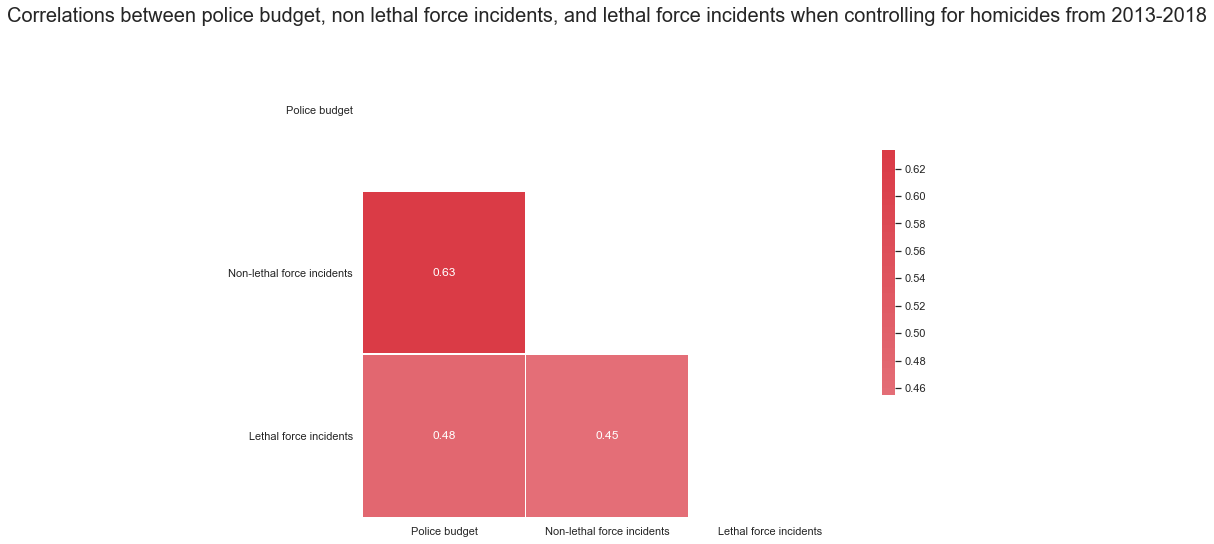

In [180]:
sns.set(style="white")

corr = np.array([[1., r1, r0],
                 [r1, 1., r2],
                 [r0, r2, 1.]])
corrdf = pd.DataFrame(data=corr, index=['Police budget', 'Non-lethal force incidents', 'Lethal force incidents'], columns=['Police budget', 'Non-lethal force incidents', 'Lethal force incidents'])

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corrdf, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corrdf, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.yticks(rotation=0) 

plt.title('Correlations between police budget, non lethal force incidents, and lethal force incidents when controlling for homicides from 2013-2018', fontsize=20)
plt.show()
   